In [3]:
import pandas as pd

# Load the provided CSV file
file_path = 'bussines new.csv'

# Check the first few rows of the dataset to understand its structure
df = pd.read_csv(file_path)
df.head()


,description,industry,level,size,line_code,value
0,Percentage of staff with internet access: 1-25%,forestry,0.0,total,B0300.01,6819.0
1,Percentage of staff with internet access: 1-25%,fishing,0.0,total,B0300.01,1344.0
2,Percentage of staff with internet access: 1-25%,tobacco,0.0,total,B0300.01,423.0
3,Percentage of staff with internet access: 1-25%,Textile,0.0,total,B0300.01,270.0
4,Percentage of staff with internet access: 1-25%,"Agriculture, forestry, & fishing",1.0,total,B0300.01,1344.0


In [4]:
# Checking for missing values and data types
df.info()

# Checking for duplicates
duplicate_rows = df.duplicated().sum()

duplicate_rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8699 entries, 0 to 8698
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  8699 non-null   object 
 1   industry     8695 non-null   object 
 2   level        8695 non-null   float64
 3   size         8699 non-null   object 
 4   line_code    8699 non-null   object 
 5   value        8695 non-null   float64
dtypes: float64(2), object(4)
memory usage: 407.9+ KB


7

In [5]:
# Dropping duplicates
df_cleaned = df.drop_duplicates()

# Handling missing values by dropping rows with missing 'industry', 'level', and 'value' as they seem critical
df_cleaned = df_cleaned.dropna(subset=['industry', 'level', 'value'])

# Re-check the dataframe for cleanliness
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8688 entries, 0 to 8698
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  8688 non-null   object 
 1   industry     8688 non-null   object 
 2   level        8688 non-null   float64
 3   size         8688 non-null   object 
 4   line_code    8688 non-null   object 
 5   value        8688 non-null   float64
dtypes: float64(2), object(4)
memory usage: 475.1+ KB


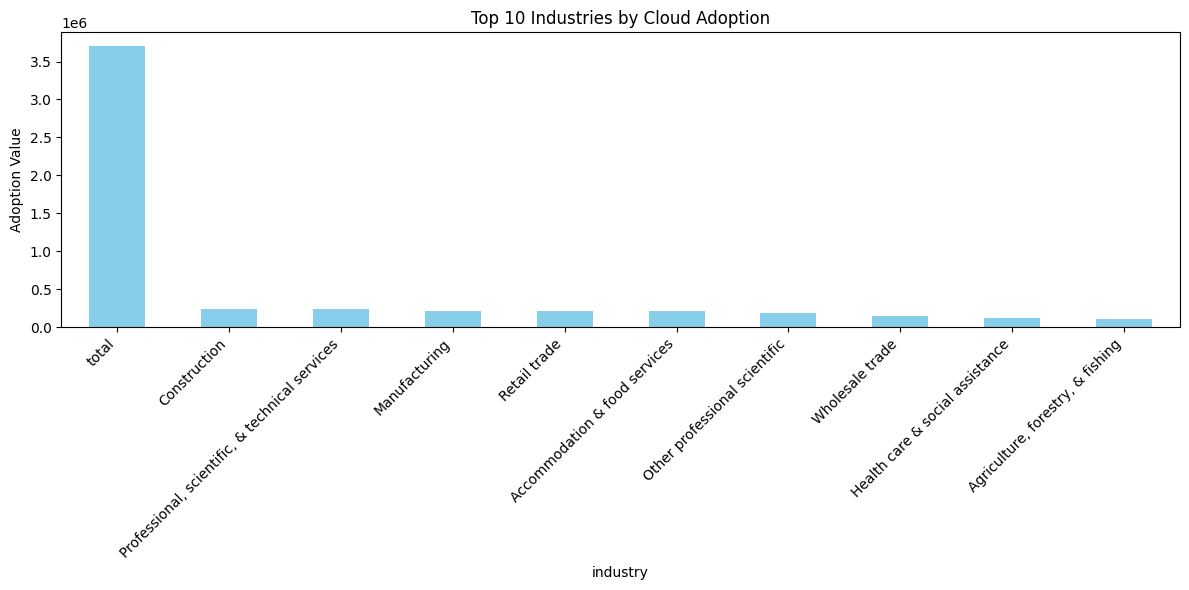

In [6]:
import matplotlib.pyplot as plt

# First visualization: Cloud adoption across different industries
plt.figure(figsize=(12, 6))
industry_adoption = df_cleaned.groupby('industry')['value'].sum().sort_values(ascending=False).head(10)
industry_adoption.plot(kind='bar', color='skyblue')
plt.title('Top 10 Industries by Cloud Adoption')
plt.ylabel('Adoption Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

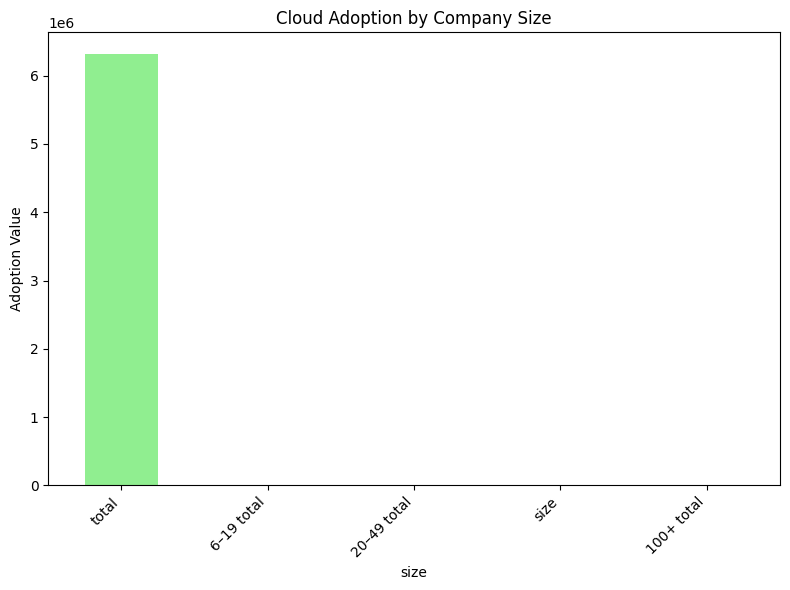

In [5]:
# Second visualization: Cloud adoption by company size
plt.figure(figsize=(8, 6))
size_adoption = df_cleaned.groupby('size')['value'].sum().sort_values(ascending=False)
size_adoption.plot(kind='bar', color='lightgreen')
plt.title('Cloud Adoption by Company Size')
plt.ylabel('Adoption Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2568\3480884177.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


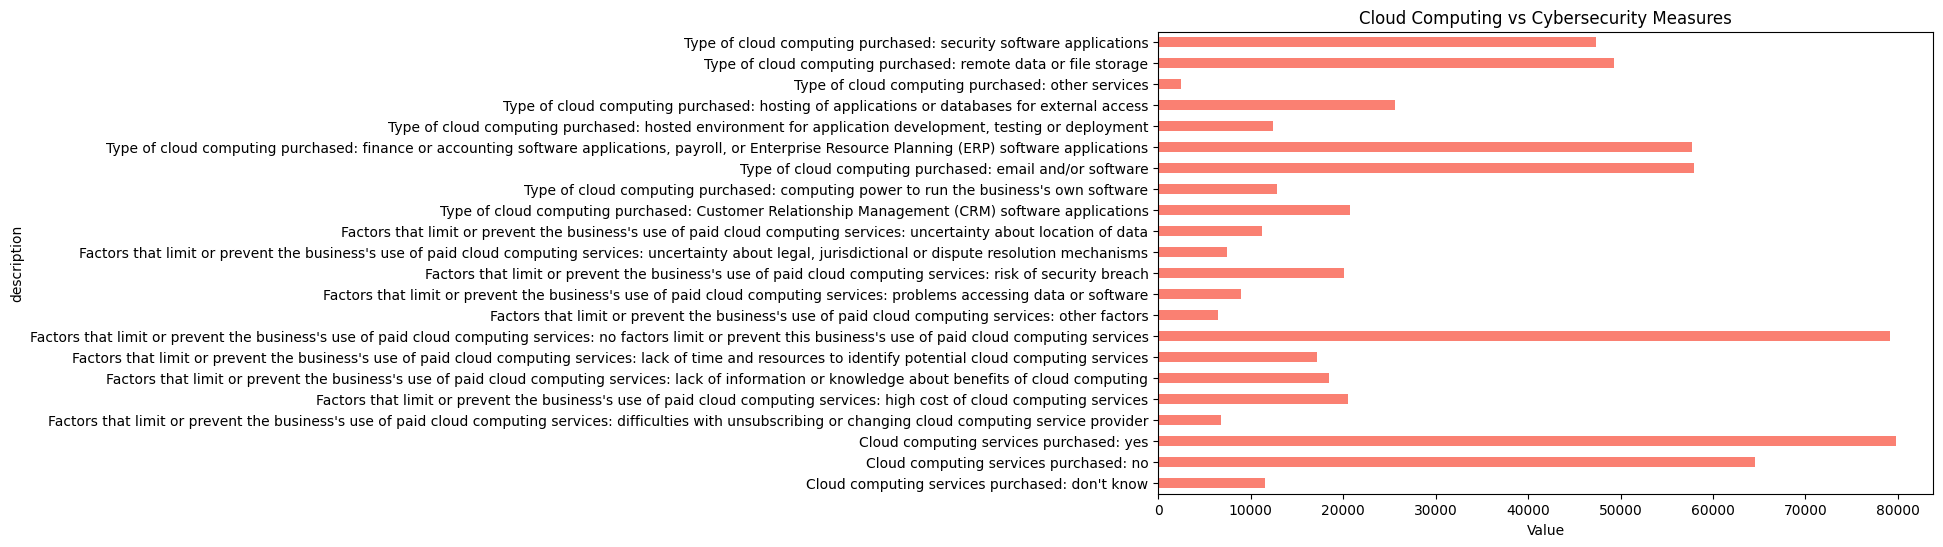

In [6]:
# Third visualization: Comparison of cloud computing and cybersecurity measures
# Filtering for relevant descriptions containing both cloud and cybersecurity
cloud_security_df = df_cleaned[df_cleaned['description'].str.contains('cloud', case=False) | df_cleaned['description'].str.contains('cybersecurity', case=False)]
cloud_security_summary = cloud_security_df.groupby('description')['value'].sum()

plt.figure(figsize=(10, 6))
cloud_security_summary.plot(kind='barh', color='salmon')
plt.title('Cloud Computing vs Cybersecurity Measures')
plt.xlabel('Value')
plt.tight_layout()
plt.show()

In [9]:
# Descriptive analysis of cloud computing and cybersecurity adoption by industry
industry_adoption_summary = df_cleaned.groupby('industry')['value'].describe()

# Descriptive analysis of cloud computing and cybersecurity adoption by company size
size_adoption_summary = df_cleaned.groupby('size')['value'].describe()

# Displaying both summaries
industry_adoption_summary,
size_adoption_summary


,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
100+ total,1.0,186.000000,NaN,186.0,186.00,186.0,186.00,186.0
20–49 total,2.0,772.500000,125.157900,684.0,728.25,772.5,816.75,861.0
6–19 total,2.0,2073.000000,576.999133,1665.0,1869.00,2073.0,2277.00,2481.0
size,1.0,1308.000000,NaN,1308.0,1308.00,1308.0,1308.00,1308.0
total,8682.0,727.848652,2615.063888,0.0,24.00,105.0,429.00,43455.0


<Figure size 1200x600 with 0 Axes>

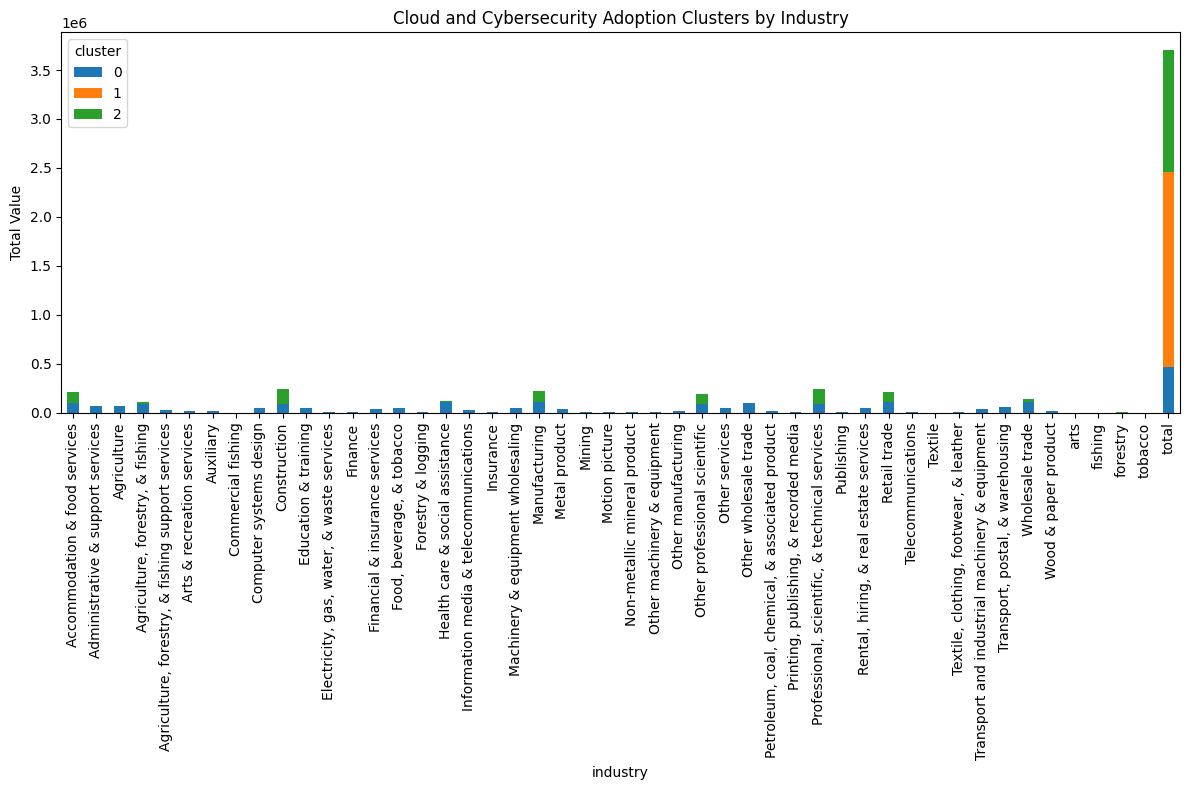

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Preprocessing the data for clustering (scaling the 'value' column)
scaler = StandardScaler()
df_cleaned['scaled_value'] = scaler.fit_transform(df_cleaned[['value']])

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(df_cleaned[['scaled_value']])

# Visualizing the clusters by industry and company size
import matplotlib.pyplot as plt

# Plotting the clusters by industry
plt.figure(figsize=(12, 6))
industry_clusters = df_cleaned.groupby(['industry', 'cluster'])['value'].sum().unstack()
industry_clusters.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cloud and Cybersecurity Adoption Clusters by Industry')
plt.ylabel('Total Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




<Figure size 800x600 with 0 Axes>

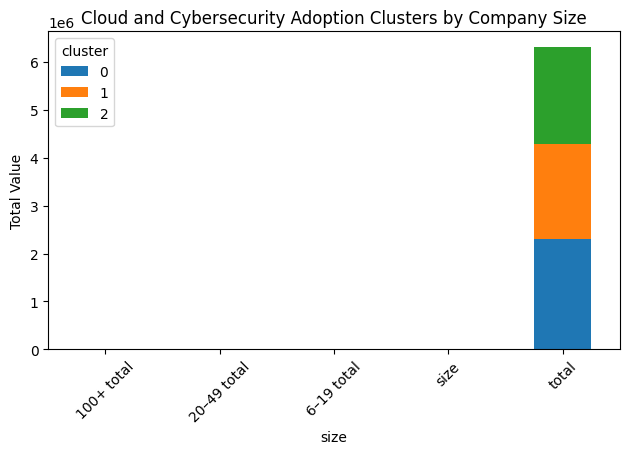

In [11]:
# Plotting the clusters by company size
plt.figure(figsize=(8, 6))
size_clusters = df_cleaned.groupby(['size', 'cluster'])['value'].sum().unstack()
size_clusters.plot(kind='bar', stacked=True)
plt.title('Cloud and Cybersecurity Adoption Clusters by Company Size')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

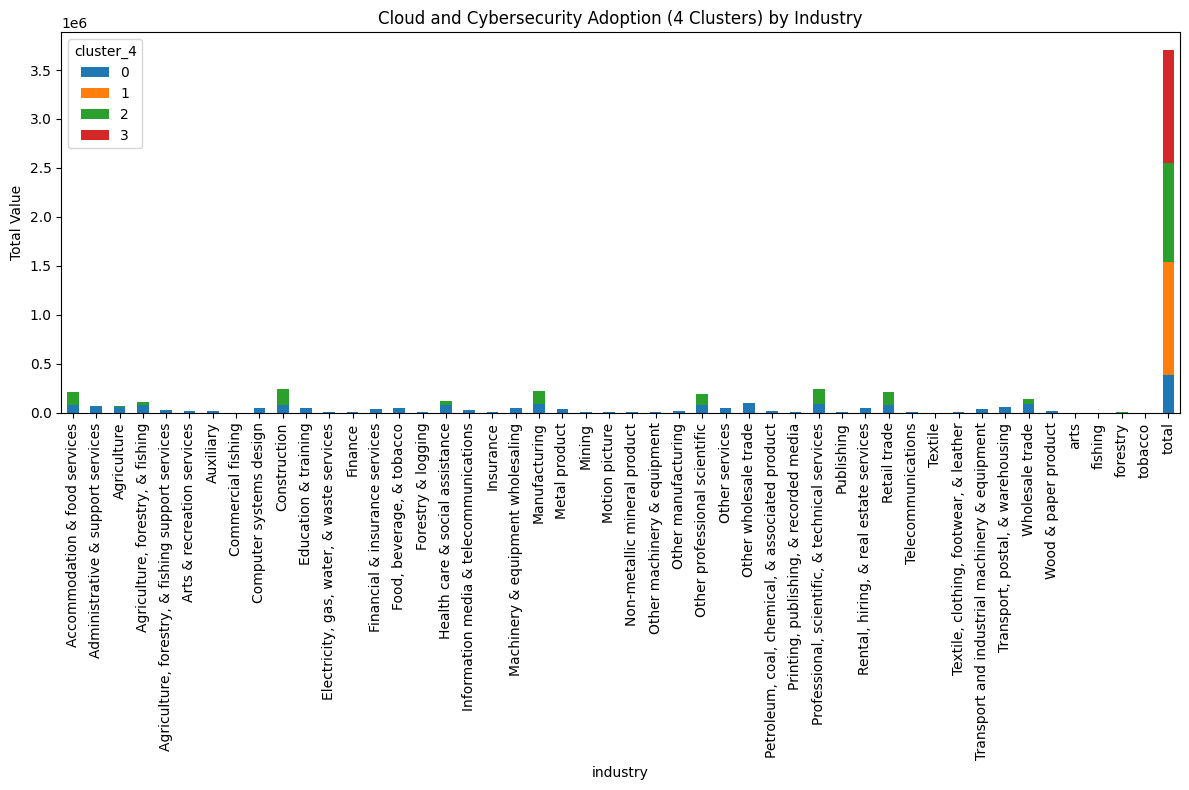

<Figure size 1200x600 with 0 Axes>

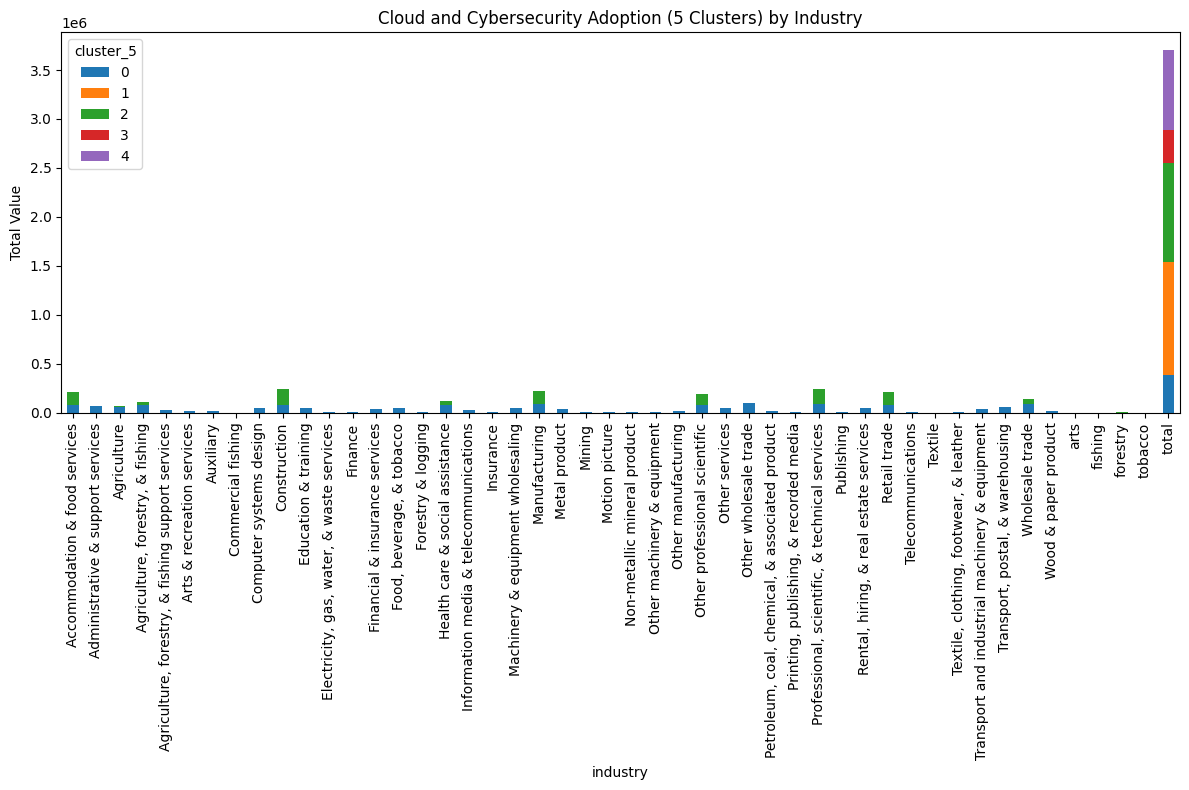

In [13]:
# Let's start with the first two points: 
# 1. Advanced Clustering and Segmentation (we will try different numbers of clusters for KMeans)
# 2. Correlation Analysis between company size, adoption rate, cybersecurity measures, and industry

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Applying KMeans clustering with a different number of clusters (let's try 4 and 5 clusters)
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df_cleaned['cluster_4'] = kmeans_4.fit_predict(df_cleaned[['scaled_value']])

kmeans_5 = KMeans(n_clusters=5, random_state=42)
df_cleaned['cluster_5'] = kmeans_5.fit_predict(df_cleaned[['scaled_value']])

# Plotting the clusters for the 4 and 5 cluster models by industry
plt.figure(figsize=(12, 6))
industry_clusters_4 = df_cleaned.groupby(['industry', 'cluster_4'])['value'].sum().unstack()
industry_clusters_4.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cloud and Cybersecurity Adoption (4 Clusters) by Industry')
plt.ylabel('Total Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
industry_clusters_5 = df_cleaned.groupby(['industry', 'cluster_5'])['value'].sum().unstack()
industry_clusters_5.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cloud and Cybersecurity Adoption (5 Clusters) by Industry')
plt.ylabel('Total Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


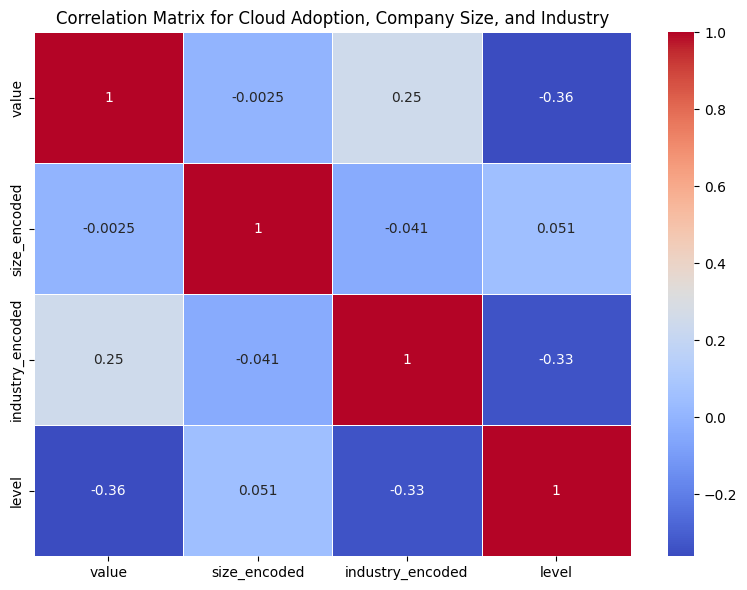

In [14]:

# Correlation Analysis - Looking at correlations between 'value' and other key factors such as 'size' and 'industry'
# First, let's encode the 'size' and 'industry' as numerical values for correlation analysis
df_cleaned['size_encoded'] = df_cleaned['size'].astype('category').cat.codes
df_cleaned['industry_encoded'] = df_cleaned['industry'].astype('category').cat.codes

# Now, checking the correlations
correlation_matrix = df_cleaned[['value', 'size_encoded', 'industry_encoded', 'level']].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Cloud Adoption, Company Size, and Industry')
plt.tight_layout()
plt.show()


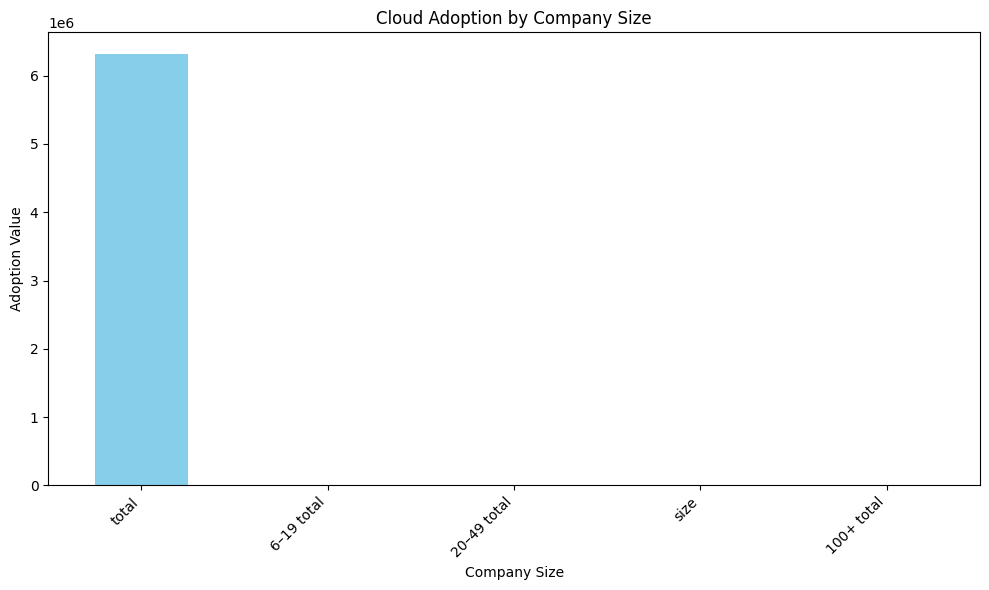

In [7]:
# Correct visualization: Cloud adoption by company size

plt.figure(figsize=(10, 6))
size_adoption = df_cleaned.groupby('size')['value'].sum().sort_values(ascending=False)
size_adoption.plot(kind='bar', color='skyblue')
plt.title('Cloud Adoption by Company Size')
plt.ylabel('Adoption Value')
plt.xlabel('Company Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


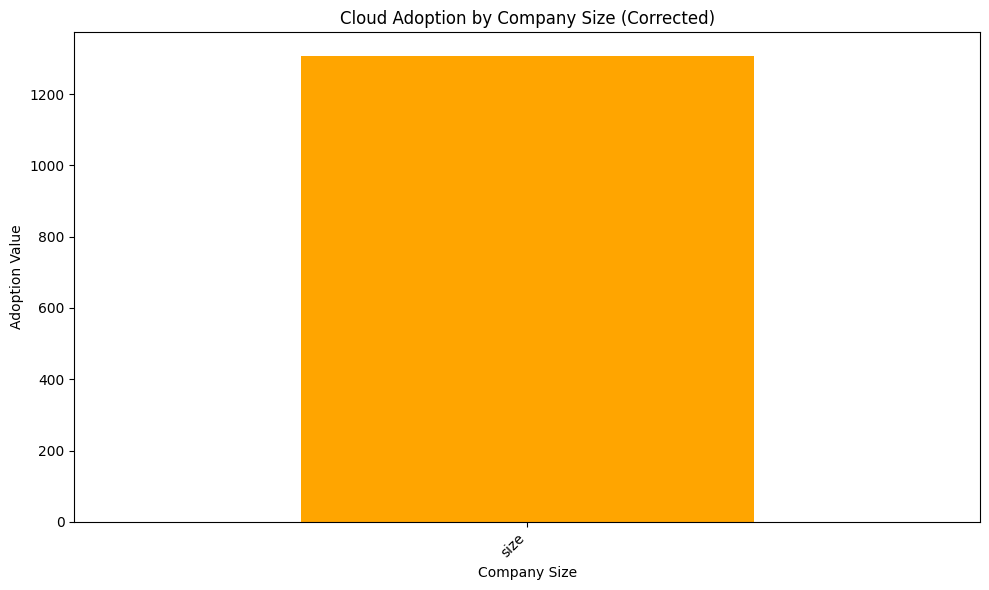

In [8]:
# Filter out "total" and other irrelevant labels
filtered_df = df_cleaned[~df_cleaned['size'].str.contains('total', case=False)]

# Group by company size and calculate adoption values
size_adoption_fixed = filtered_df.groupby('size')['value'].sum().sort_values(ascending=False)

# Plot the corrected chart
plt.figure(figsize=(10, 6))
size_adoption_fixed.plot(kind='bar', color='orange')
plt.title('Cloud Adoption by Company Size (Corrected)')
plt.ylabel('Adoption Value')
plt.xlabel('Company Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
